<a href="https://colab.research.google.com/github/hplp/intro-to-training-ichauhansahil/blob/feedback/Clear_NumpyTFandVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy, TF, and Visualization

## Start by importing necessary packages
We will begin by importing necessary libraries for this notebook. Run the cell below to do so.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf

## Visualizations

Visualization is a key factor in understanding deep learning models and their behavior. Typically, pyplot from the matplotlib package is used, capable of visualizing series and 2D data.

Below is an example of visualizing series data.

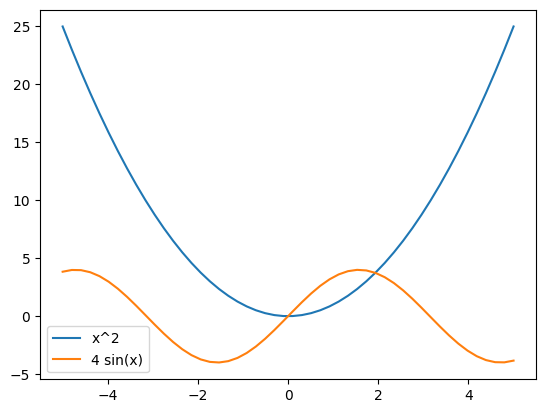

In [2]:
x = np.linspace(-5, 5, 50) # create a linear spacing from x = -5.0 to 5.0 with 50 steps

y1 = x**2      # create a series of points {y1}, which corresponds to the function f(x) = y^2
y2 = 4*np.sin(x) # create another series of points {y2}, which corresponds to the function f(x) = 4*sin(x)  NOTE: we have to use np.sin and not math.sin as math.sin will only act on individual values
# to use math.sin, we could have used a list comprehension instead: y2 = [math.sin(xi) for xi in x]

# by default, matplotlib will behave like MATLAB with hold(True), overplotting until a new figure object is created
plt.plot(x, y1, label="x^2")        # plot y1 with x as the x-axis series, and label the line "x^2"
plt.plot(x, y2, label="4 sin(x)")   # plot y2 with x as the x-axis series, and label the line "4 sin(x)"
plt.legend()                        # have matplotlib show the label on the plot

More complex formatting can be added to increase the visual appeal and readability of plots (especially for paper quality figures).
To try this out, let's consider plotting a few of the more common activation functions used in machine learning.
Below, plot the following activation functions for $x\in[-4, 4]$:


*   ReLU: $max(x, 0)$
*   Leaky-ReLU: $max(0.1\cdot x, x)$
*   Sigmoid: $\sigma(x) = 1/(1 + e^{-x})$
*   Hyperbolic Tangent: $\mathrm{tanh}(x) = (e^{x} - e^{-x})/(e^{x} + e^{-x})$
*   SiLU: $x \cdot \sigma(x)$
*   GeLU: $x \cdot \frac{1}{2} \left(1 + \mathrm{erf}\left(\frac{x}{\sqrt{2}}\right)\right)$
*   tanh GELU: $x \cdot \frac{1}{2} \left(1 + \mathrm{tanh}\left(\frac{x}{\sqrt{2}}\right)\right)$

Plot the GELU and tanh GELU using the same color, but with tanh using a dashed line (tanh is a common approximation as the error-function is computationally expensive to compute).
You may also need to adjust the legend to make it easier to read.
I recommend using ChatGPT to help find the formatting options here.

**Question 1**



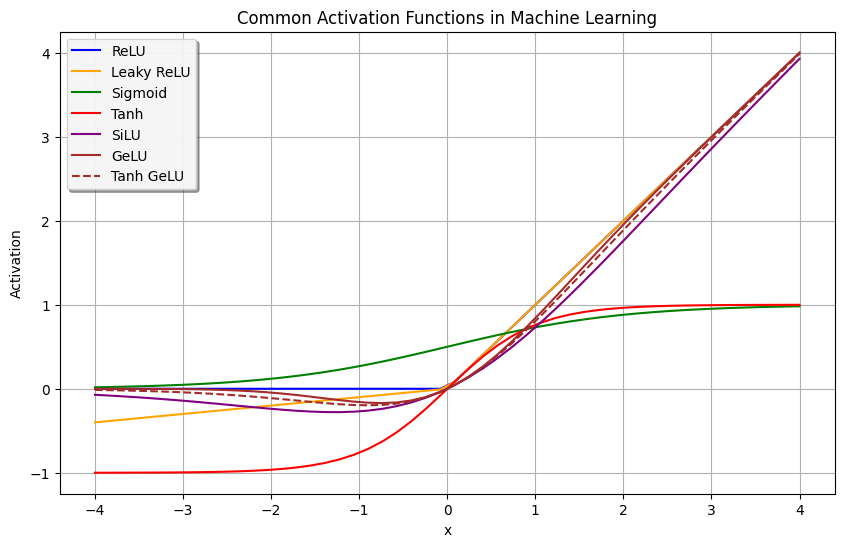

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# Define the activation functions
def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.1):
    return np.maximum(alpha * x, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def silu(x):
    return x * sigmoid(x)

def gelu(x):
    return x * 0.5 * (1 + erf(x / np.sqrt(2)))

def tanh_gelu(x):
    return x * 0.5 * (1 + np.tanh(x / np.sqrt(2)))

# Create a linear spacing for x from -4 to 4 with 50 steps
x = np.linspace(-4, 4, 50)

# Plot each activation function
plt.figure(figsize=(10, 6))

plt.plot(x, relu(x), label='ReLU', color='blue')
plt.plot(x, leaky_relu(x), label='Leaky ReLU', color='orange')
plt.plot(x, sigmoid(x), label='Sigmoid', color='green')
plt.plot(x, tanh(x), label='Tanh', color='red')
plt.plot(x, silu(x), label='SiLU', color='purple')
plt.plot(x, gelu(x), label='GeLU', color='brown')
plt.plot(x, tanh_gelu(x), label='Tanh GeLU', color='brown', linestyle='dashed')

# Add grid, labels, title, and legend
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Activation')
plt.title('Common Activation Functions in Machine Learning')
plt.legend(loc='upper left', frameon=True, framealpha=0.9, fancybox=True, shadow=True)

# Display the plot
plt.show()


Answer to the following questions from the the plot you just created:


1.   Which activation function is the least computationally expensive to compute?
2.   Are there better choices to ensure more stable training? What downfalls do you think it may have?
3.   Are there any cases where you would not want to use either activation function?

**Question 2**

1. The ReLU (Rectified Linear Unit) is the least computationally expensive to compute. It involves a simple comparison and returns either 0 or the input value max(0,𝑥). This makes it highly efficient, as it requires no complex mathematical operations.

2. Better choices for more stable training: The SiLU (Swish), GeLU, and Tanh activation functions can lead to more stable training, especially in deeper neural networks. These functions are smooth and have non-zero gradients across their entire range, which helps to avoid the "dying neuron" problem that can occur with ReLU, where some neurons might stop learning because their gradients become zero.
 Downfalls:
 SiLU and GeLU are more computationally expensive compared to ReLU due to the inclusion of exponential and error function calculations, respectively.
 Tanh can saturate, meaning for very large or very small inputs, the gradient becomes near zero, which can slow down learning and lead to the vanishing gradient problem.

3. ReLU:

 In situations where inputs frequently go below zero, a significant portion of the neurons may become inactive (output zero), leading to the "dying neuron" problem.
 Leaky ReLU (a variant of ReLU) can mitigate this to some extent.


### Visualizing 2D data

In many cases, we also want the ability to visualize multi-dimensional data such as images. To do so, matplotlib has the imshow method, which can visualize single channel data with a heatmap, or RGB data with color.

Let's consider visualizing the first 8 training images from the MNIST dataset. MNIST consists of hand drawn digits with their corresponding labels (a number from 0 to 9).

We will use the tensorflow keras dataset library to load the dataset, and then visualize the images with a matplotlib subplot.
Because we have so many images, we should arrange them in a grid (4 horizontal, 2 vertical), and plot each image in a loop.
Furthermore, we can append the label to each image using the matplotlib utility.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


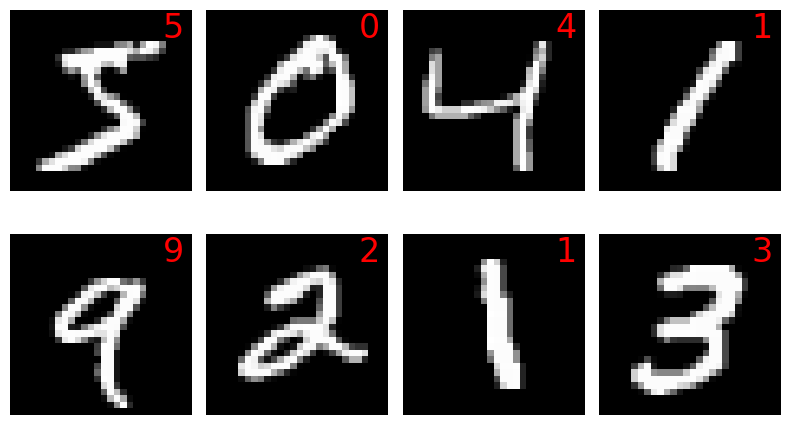

In [4]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Define the grid dimensions
rows, cols = 2, 4

# Create a figure and axes for the grid
fig, axes = plt.subplots(rows, cols, figsize=(8, 5))

# Iterate through the grid
for i in range(rows):
    for j in range(cols):
        index = i * cols + j
        ax = axes[i, j]

        # Display the image
        ax.imshow(train_images[index], cmap='gray')

        # Display the label on top of the image in red text
        ax.text(0.9, 0.9, str(train_labels[index]), color='red',
                transform=ax.transAxes, fontsize=24,
                ha='center', va='center')

        # Turn off axis labels
        ax.axis('off')

# Adjust spacing and layout
plt.tight_layout()

Another popular image dataset for benchmarking and evaluation is CFAR-10. This dataset consists of small (32 x 32 pixel) RGB images of objects that fall into one of 10 classes:

0.   airplane
1.   automobile
2.   bird
3.   cat
4.   deer
5.   dog
6.   frog
7.   horse
8.   ship
9.  truck


Plot the first 32 images in the dataset using the same method above.

**Question 3**

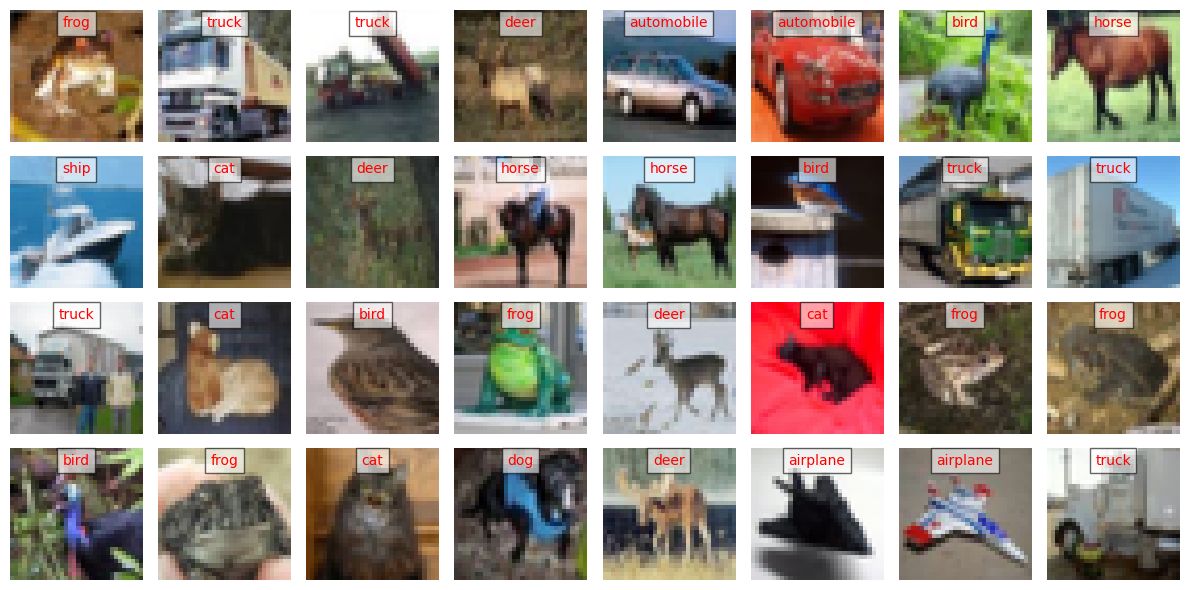

In [6]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Define the grid dimensions
rows, cols = 4, 8  # 4 rows and 8 columns for 32 images

# Create a figure and axes for the grid
fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

# CIFAR-10 class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Iterate through the grid
for i in range(rows):
    for j in range(cols):
        index = i * cols + j
        ax = axes[i, j]

        # Display the image
        ax.imshow(train_images[index])

        # Display the class label on top of the image
        ax.text(0.5, 0.9, class_names[train_labels[index][0]], color='red',
                transform=ax.transAxes, fontsize=10,
                ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6))

        # Turn off axis labels
        ax.axis('off')

# Adjust spacing and layout
plt.tight_layout()
plt.show()


### Visualizing Tensors

Aside from visualzing linear functions and images, we can also visualize entire tensors from DL models.

In [7]:
# first, let's download an existing model to inspect
model = tf.keras.applications.VGG16(weights='imagenet')

# can then print the summary of what the model is composed of
print(model.summary())

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
# we can also print the model layers based on index to better understand the structure
for i,layer in enumerate(model.layers):
  print(f"{i}: {layer}")

0: <InputLayer name=input_layer, built=True>
1: <Conv2D name=block1_conv1, built=True>
2: <Conv2D name=block1_conv2, built=True>
3: <MaxPooling2D name=block1_pool, built=True>
4: <Conv2D name=block2_conv1, built=True>
5: <Conv2D name=block2_conv2, built=True>
6: <MaxPooling2D name=block2_pool, built=True>
7: <Conv2D name=block3_conv1, built=True>
8: <Conv2D name=block3_conv2, built=True>
9: <Conv2D name=block3_conv3, built=True>
10: <MaxPooling2D name=block3_pool, built=True>
11: <Conv2D name=block4_conv1, built=True>
12: <Conv2D name=block4_conv2, built=True>
13: <Conv2D name=block4_conv3, built=True>
14: <MaxPooling2D name=block4_pool, built=True>
15: <Conv2D name=block5_conv1, built=True>
16: <Conv2D name=block5_conv2, built=True>
17: <Conv2D name=block5_conv3, built=True>
18: <MaxPooling2D name=block5_pool, built=True>
19: <Flatten name=flatten, built=True>
20: <Dense name=fc1, built=True>
21: <Dense name=fc2, built=True>
22: <Dense name=predictions, built=True>


Not all of these layers contain weights, for example, MaxPooling2D is a stateless operation, and so is Flatten.
Conv2D and Dense are the two layer types that can be visualized.
That said, let's visualize the filter kernels in the first convoluton layer.

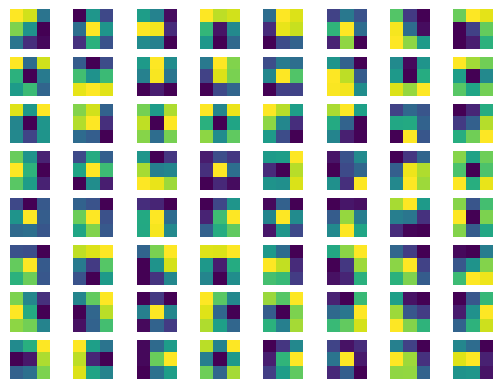

In [9]:
# next we can extract som
layer = model.layers[1] # Get the first convolutional layer
weights = layer.get_weights()[0]

n_filters = weights.shape[-1]

for i in range(n_filters):
    plt.subplot(8, 8, i+1)  # Assuming 64 filters, adjust if necessary
    plt.imshow(weights[:, :, 0, i], cmap="viridis")
    plt.axis('off')

Aside from visualizing the weights directly, we can also compute and visualize the weight distribution using a histogram.

weight tensor has mean: -0.0024379086680710316 and variance: 0.04272466152906418


(array([ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,
         2.,  7.,  2.,  4.,  7.,  6.,  6., 11.,  7.,  9., 12.,  6.,  9.,
        17., 11., 14., 10., 23., 18., 14., 15., 25., 20., 25., 38., 35.,
        38., 44., 32., 41., 42., 44., 38., 36., 32., 42., 40., 31., 23.,
        52., 32., 28., 52., 35., 24., 26., 40., 44., 45., 46., 43., 43.,
        42., 31., 24., 25., 18., 26., 23., 16., 18., 14., 15., 16.,  7.,
        10., 12., 14., 10.,  5.,  9., 10.,  3.,  7.,  4.,  2.,  1.,  2.,
         3.,  2.,  2.,  1.,  1.,  1.,  1.,  0.,  1.]),
 array([-0.67140007, -0.65860093, -0.64580172, -0.63300258, -0.62020344,
        -0.60740429, -0.59460509, -0.58180594, -0.5690068 , -0.55620766,
        -0.54340845, -0.53060931, -0.51781017, -0.50501096, -0.49221182,
        -0.47941267, -0.4666135 , -0.45381436, -0.44101518, -0.42821604,
        -0.41541687, -0.40261772, -0.38981855, -0.37701941, -0.36422023,
        -0.35142106, -0.33862191, -0.32582274, -0.3130236 , -0.300224

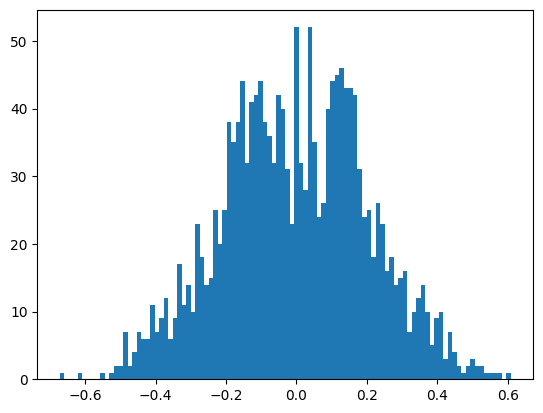

In [10]:

# we can use the mean and var (variance) functions built in to calculate some simple statistics
print(f"weight tensor has mean: {weights.mean()} and variance: {weights.var()}")

# we need to call .flatten() on the tensor so that all the histogram sees them as a 1D array. Then we can plot with 100 bins to get a bit more resolution in the histogram.
plt.hist(weights.flatten(), bins=100)

Look through the other weight tensors in the network and note any patterns that can be observed. Plot some examples in a subplot grid (include at least 4 plots).
You can also overplot on the same subplot if you find that helpful for visualization.

**Question 4**

Layer 10 - block3_pool does not have weights.
Layer 14 - block4_pool does not have weights.


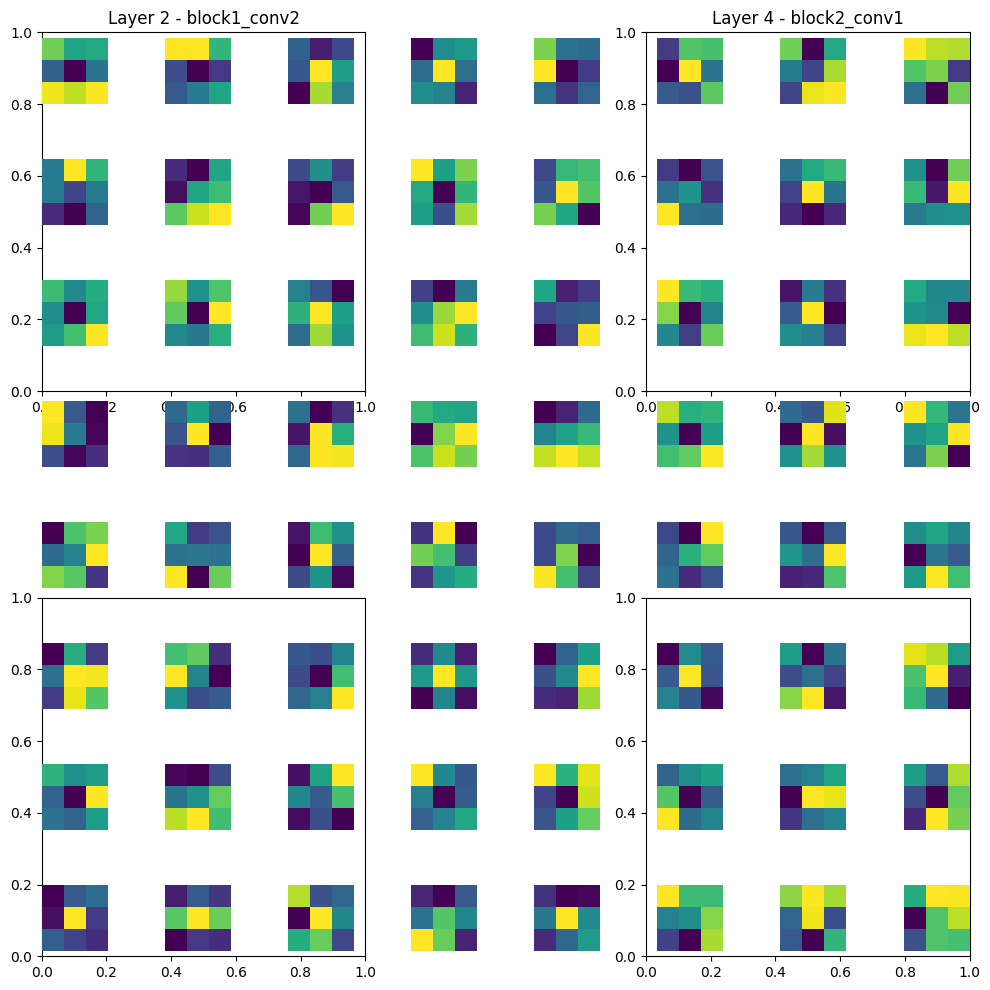

Layer 2 - block1_conv2
Mean: 0.004912246484309435, Variance: 0.0018043764866888523


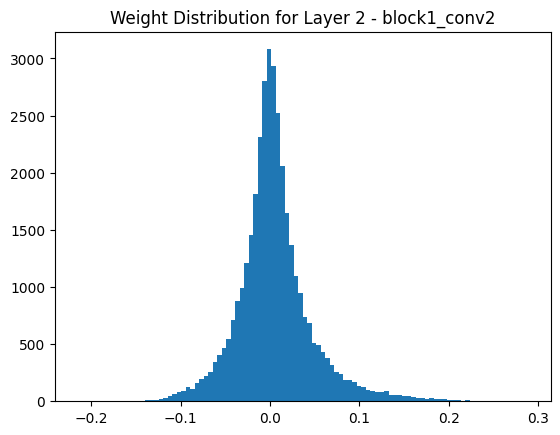

Layer 4 - block2_conv1
Mean: 0.0001985915150726214, Variance: 0.0010383264161646366


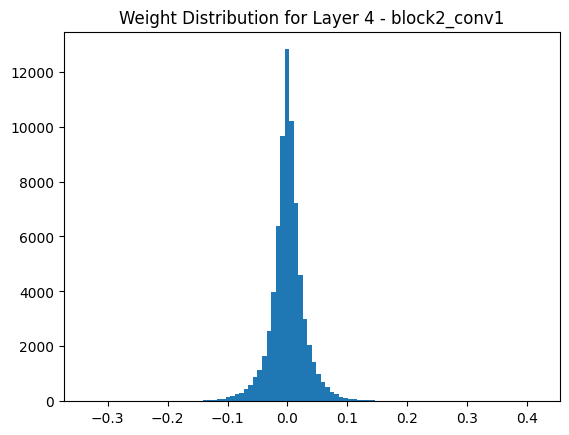

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the pre-trained VGG16 model
model = tf.keras.applications.VGG16(weights='imagenet')

# Define the layer indices we want to inspect
layers_to_inspect = [2, 4, 10, 14]

# Create a figure for plotting
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Loop over the layers to inspect
for idx, layer_idx in enumerate(layers_to_inspect):
    # Get the layer
    layer = model.layers[layer_idx]

    # Check if the layer has weights
    if len(layer.get_weights()) > 0:
        # Extract the weights (filters) from the layer
        weights = layer.get_weights()[0]

        # Get the number of filters in this layer
        n_filters = weights.shape[-1]

        # Plot each filter in the grid
        for i in range(min(n_filters, 64)):  # Limit to the first 64 filters
            # Use plt.subplot here to specify the position of each filter
            plt.subplot(8, 8, i + 1)  # Create a subplot for each filter
            plt.imshow(weights[:, :, 0, i], cmap="viridis")  # Use the first channel (RGB or grayscale)
            plt.axis('off')

        # Set title for the subplot
        axes[idx // 2, idx % 2].set_title(f"Layer {layer_idx} - {layer.name}")
    else:
        print(f"Layer {layer_idx} - {layer.name} does not have weights.")

# Adjust layout
plt.tight_layout()
plt.show()

# Optionally, plot the weight distributions as histograms
for layer_idx in layers_to_inspect:
    layer = model.layers[layer_idx]

    if len(layer.get_weights()) > 0:
        weights = layer.get_weights()[0]

        # Compute and print statistics
        print(f"Layer {layer_idx} - {layer.name}")
        print(f"Mean: {weights.mean()}, Variance: {weights.var()}")

        # Plot the weight distribution (histogram)
        plt.hist(weights.flatten(), bins=100)
        plt.title(f"Weight Distribution for Layer {layer_idx} - {layer.name}")
        plt.show()


We can also visualize the activations within the network, this is done by applying a forward pass with a data input, and extracting the intermediate result. Below is an example output from the first convolution layer.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


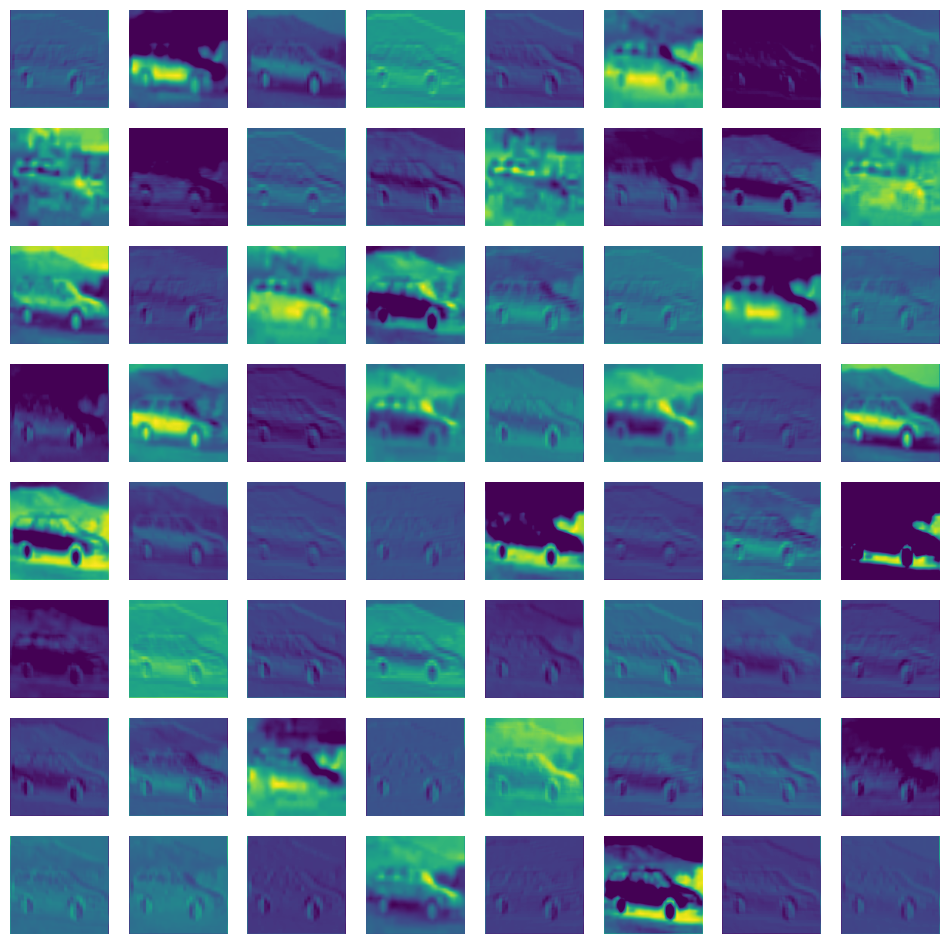

In [16]:
# Resize and normalize the images to be suitable for VGG16
train_images_resized = tf.image.resize(train_images[4:5], [224, 224])

# Normalize the pixel values to [0,1]
train_images_resized = train_images_resized / 255.0

layer = model.layers[1] # Get the first convolutional layer
intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=layer.output)
activation = intermediate_layer_model.predict(train_images_resized)

# get the feature count from the activations
n_features = activation.shape[-1]

# Set the figure size
plt.figure(figsize=(12, 12))

for i in range(n_features):
    plt.subplot(8, 8, i+1)  # Assuming 64 features, adjust if necessary
    plt.imshow(activation[0, :, :, i], cmap="viridis")
    plt.axis('off')

Using the above code for the forward pass, and the layer indices, plot the activation distributions for the final three dense layers.

**Question 5**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


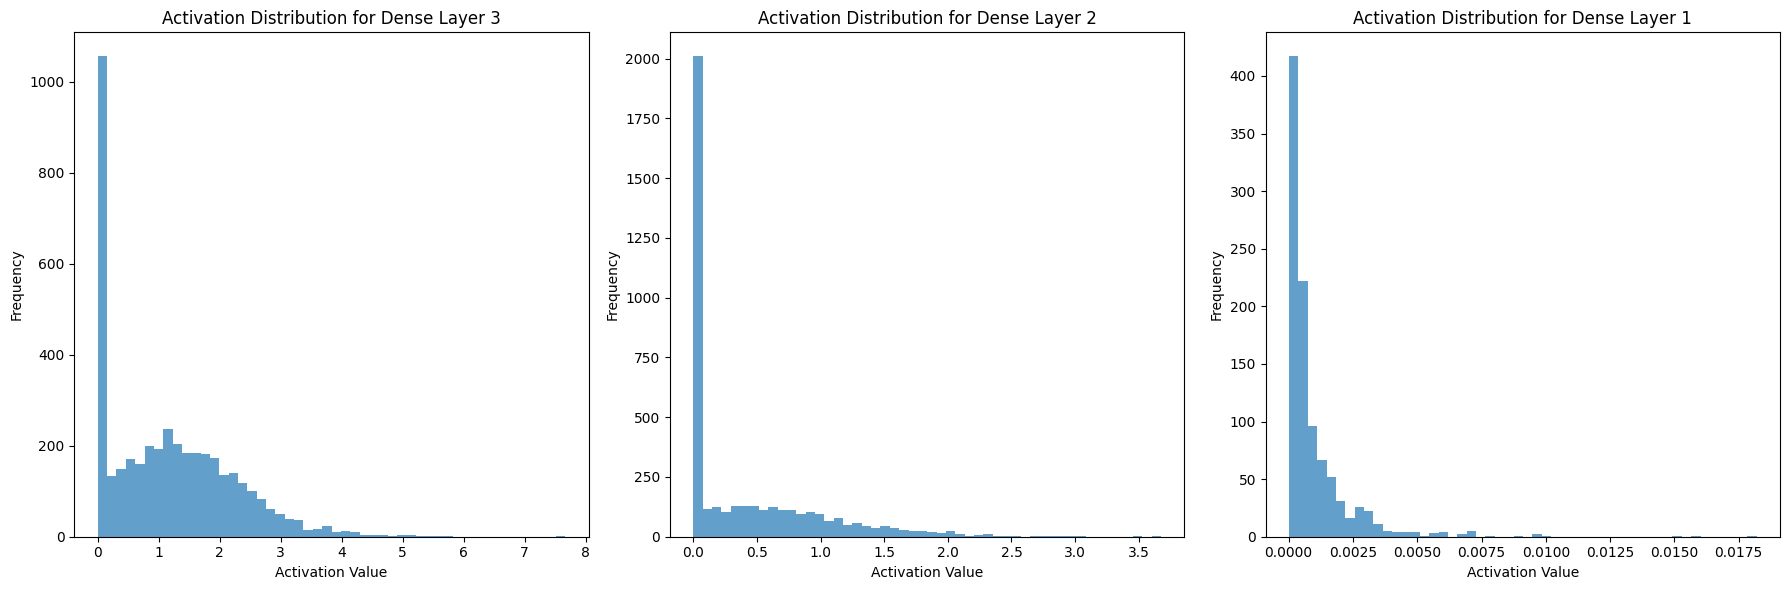

In [18]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Resize and normalize the images to be suitable for VGG16
train_images_resized = tf.image.resize(train_images[4:5], [224, 224])

# Normalize the pixel values to [0,1]
train_images_resized = train_images_resized / 255.0

# Define indices for the final three dense layers (e.g., dense layers 1, 2, and 3)
# Adjust the layer indices based on your model structure
dense_layer_indices = [-3, -2, -1]  # Last three layers

# Get activations for each dense layer
activations = []

for layer_index in dense_layer_indices:
    layer = model.layers[layer_index]
    intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=layer.output)
    activation = intermediate_layer_model.predict(train_images_resized)
    activations.append(activation)

# Set the figure size
plt.figure(figsize=(18, 6))

# Plot the activation distributions for each dense layer
for i, activation in enumerate(activations):
    plt.subplot(1, 3, i+1)
    plt.hist(activation.flatten(), bins=50, alpha=0.7)
    plt.title(f'Activation Distribution for Dense Layer {len(dense_layer_indices)-i}')
    plt.xlabel('Activation Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


What do you notice about the distributions, and how they compare to those of the weight tensors?

**Question 6**

Activation distributions in neural networks are typically more constrained and narrower compared to weight distributions. While weight tensors are initialized with wider ranges (often following Gaussian or other initialization schemes), activations are shaped by the nonlinearity of activation functions like ReLU, Sigmoid, or Tanh, leading to more restricted values. For instance, ReLU activations are often right-skewed, with many values clustered at zero, whereas weight distributions are more uniform and can exhibit larger variance, especially early in training. Activations also tend to show sparsity, particularly with ReLU, while weights evolve more continuously during training. These differences highlight the contrast in how the network learns and processes information versus how it initially sets up its parameters.